In [1]:
import os
from os.path import join
import gc
import re
from tqdm import tqdm

import sys

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, os.path.join(ROOT_DIR,'py'))

import pandas as pd

import util
from plotter import TrackingDataPlotter

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
# Define the path to the data folder
DATA_DIR = "../data/"

df_game = pd.read_csv(join(DATA_DIR, "games.csv"))
df_play = pd.read_csv(join(DATA_DIR, "plays.csv"))
df_player_play = pd.read_csv(join(DATA_DIR, "player_play.csv"))
df_player = pd.read_csv(join(DATA_DIR, "players.csv"))

tracking_dfs = []
for wk in tqdm(range(1,10), desc="Loading tracking files"):
    df = pd.read_csv(join(DATA_DIR, f'tracking_week_{wk}.csv'))
    if 'week' not in df.columns:
        df.insert(3,'week',wk)
    tracking_dfs.append(df)
    
df_tracking = pd.concat(tracking_dfs, axis=0)

del tracking_dfs

Loading tracking files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.37it/s]


In [3]:
util.uncamelcase_columns(df_game)
util.uncamelcase_columns(df_player)
util.uncamelcase_columns(df_play)
util.uncamelcase_columns(df_player_play)
util.uncamelcase_columns(df_tracking)

# standardize direction to be offense moving right
df_tracking = util.standardize_direction(df_tracking)

In [4]:
df_tracking.head()

,game_id,play_id,nfl_id,week,display_name,frame_id,frame_type,time,jersey_number,club,play_direction,x,y,s,a,dis,o,dir,event
0,2022110700,56,33131.0,9,Calais Campbell,1,BEFORE_SNAP,2022-11-08 01:16:09.2,93.0,BAL,left,37.00,24.86,0.0,0.0,0.01,252.94,66.87,huddle_break_offense
1,2022110700,56,33131.0,9,Calais Campbell,2,BEFORE_SNAP,2022-11-08 01:16:09.3,93.0,BAL,left,37.00,24.85,0.0,0.0,0.01,253.54,51.30,NaN
2,2022110700,56,33131.0,9,Calais Campbell,3,BEFORE_SNAP,2022-11-08 01:16:09.4,93.0,BAL,left,36.99,24.85,0.0,0.0,0.01,253.54,42.41,NaN
3,2022110700,56,33131.0,9,Calais Campbell,4,BEFORE_SNAP,2022-11-08 01:16:09.5,93.0,BAL,left,36.98,24.85,0.0,0.0,0.01,254.50,37.19,NaN
4,2022110700,56,33131.0,9,Calais Campbell,5,BEFORE_SNAP,2022-11-08 01:16:09.6,93.0,BAL,left,36.98,24.84,0.0,0.0,0.00,255.76,38.18,NaN


In [5]:
df_game.head()

,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,home_final_score,visitor_final_score
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [6]:
df_player.head()

,nfl_id,height,weight,birth_date,college_name,position,display_name
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [7]:
df_player_play.head()

,game_id,play_id,nfl_id,team_abbr,had_rush_attempt,rushing_yards,had_dropback,passing_yards,sack_yards_as_offense,had_pass_reception,receiving_yards,was_targetted_receiver,yardage_gained_after_the_catch,fumbles,fumble_lost,fumble_out_of_bounds,assisted_tackle,forced_fumble_as_defense,half_sack_yards_as_defense,pass_defensed,quarterback_hit,sack_yards_as_defense,safety_as_defense,solo_tackle,tackle_assist,tackle_for_a_loss,tackle_for_a_loss_yardage,had_interception,interception_yards,fumble_recoveries,fumble_recovery_yards,penalty_yards,penalty_names,was_initial_pass_rusher,caused_pressure,time_to_pressure_as_pass_rusher,get_off_time_as_pass_rusher,in_motion_at_ball_snap,shift_since_lineset,motion_since_lineset,was_running_route,route_ran,blocked_player_n_f_l_id1,blocked_player_n_f_l_id2,blocked_player_n_f_l_id3,pressure_allowed_as_blocker,time_to_pressure_allowed_as_blocker,pff_defensive_coverage_assignment,pff_primary_defensive_coverage_matchup_nfl_id,pff_secondary_defensive_coverage_matchup_nfl_id
0,2022090800,56,35472,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,True,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_play.head()

,game_id,play_id,play_description,quarter,down,yards_to_go,possession_team,defensive_team,yardline_side,yardline_number,game_clock,pre_snap_home_score,pre_snap_visitor_score,play_nullified_by_penalty,absolute_yardline_number,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,expected_points,offense_formation,receiver_alignment,play_clock_at_snap,pass_result,pass_length,target_x,target_y,play_action,dropback_type,dropback_distance,pass_location_type,time_to_throw,time_in_tackle_box,time_to_sack,pass_tipped_at_line,unblocked_pressure,qb_spike,qb_kneel,qb_sneak,rush_location_type,penalty_yards,pre_penalty_yards_gained,yards_gained,home_team_win_probability_added,visitor_team_win_probility_added,expected_points_added,is_dropback,pff_run_concept_primary,pff_run_concept_secondary,pff_run_pass_option,pff_pass_coverage,pff_man_zone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,01:54,35,17,N,31,0.982017,0.017983,0.719313,EMPTY,3x2,10.0,C,6.0,36.69,16.51,False,TRADITIONAL,2.40,INSIDE_BOX,2.990,2.990,NaN,False,False,False,0,NaN,NaN,NaN,9,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,02:13,17,17,N,18,0.424356,0.575644,0.607746,EMPTY,3x2,9.0,C,4.0,20.83,20.49,False,TRADITIONAL,1.14,INSIDE_BOX,1.836,1.836,NaN,False,False,False,0,NaN,NaN,NaN,4,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,02:00,3,17,N,30,0.006291,0.993709,-0.291485,SHOTGUN,2x2,12.0,C,-4.0,26.02,17.56,False,TRADITIONAL,3.20,INSIDE_BOX,2.236,2.236,NaN,False,False,False,0,NaN,NaN,NaN,6,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,09:28,0,0,N,33,0.884223,0.115777,4.249382,SHOTGUN,2x2,11.0,C,-6.0,38.95,14.19,False,TRADITIONAL,3.02,INSIDE_BOX,2.202,2.202,NaN,False,False,False,0,NaN,NaN,NaN,4,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,02:16,10,10,N,37,0.410371,0.589629,3.928413,PISTOL,3x1,8.0,NaN,NaN,NaN,NaN,True,DESIGNED_RUN,2.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,INSIDE_LEFT,NaN,-1,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [119]:
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

from field_control import field_control

class TrackingDataPlotter:
    def __init__(self, df_game, df_play, df_player):
        self.df_game = df_game
        self.df_play = df_play
        self.df_player = df_player

    def plot_play(self, df_tracking, save_path=None, plot_arrows=True, plot_field_control=False,
                  field_control_granularity=0.7, colorbar=True):
        z_ord = {
            'football': 5,
            'player': 4,
            'los': 3,
            'first_down': 3,
            'field_ctrl': 2,
            'field': 1
        }

        alpha = {
            'player': 0.8,
            'field': 1,
            'field_ctrl': 0.6,
            'first_down': 0.4,
            'los': 0.9
        }

        color = {
            'off': 'green',
            'def': 'purple',
            'yardline': 'silver',
            'first_down': 'darkblue',
            'los': 'yellow',
            'football': 'brown',
            'field_ctrl': 'PRGn'
        }

        df = df_tracking.copy()
        if df.play_id.nunique() != 1:
            raise ValueError('df_tracking must be a single play')
        if df.game_id.nunique() != 1:
            raise ValueError('df_tracking must be a single game')

        gid = df.game_id.values[0]
        pid = df.play_id.values[0]
        play = self.df_play[(self.df_play.game_id == gid) & (self.df_play.play_id == pid)].to_dict(orient='records')[0]
        week = df.week.values[0]
        game = self.df_game[self.df_game.game_id==gid].to_dict(orient='records')[0]
        home_tm = game['home_team_abbr']
        away_tm = game['visitor_team_abbr']
        home_tm_score = play['pre_snap_home_score']
        away_tm_score = play['pre_snap_visitor_score']
        down_mapper = {1:'1st',2:'2nd',3:'3rd',4:'4th'}
        down = down_mapper[play['down']]
        play_desc = f"Q{play['quarter']} - {down} & {play['yards_to_go']} - {play['play_description']}"
        
        fig, ax = plt.subplots(figsize=(12, 6.33))

        x_min_yardline = int((df.x.min() // 10) * 10)
        x_max_yardline = int(math.ceil(df.x.max() / 10) * 10)

        df['dir_radians'] = np.radians(df['dir'])
        not_football = df['club'] != "football"
        df['dx'] = np.where(not_football, np.cos(df['dir_radians']) * df['s'] * 0.5, None)
        df['dy'] = np.where(not_football, np.sin(df['dir_radians']) * df['s'] * 0.5, None)
        df['offense'] = df['club'] == play['possession_team']

        def plot_field():
            ax.axhline(y=0, color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'], xmin=0, xmax=120)
            ax.axhline(y=53.3, color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'], xmin=0, xmax=120)

            for x in range(x_min_yardline, x_max_yardline + 1, 10):
                if not (x < 10 or x > 110):
                    ax.axvline(x=x, color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'])
                if x >= 20 and x <= 60:
                    ax.text(x=x-1.15, y=5, s=str(x-10), fontsize=12, 
                            color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'])
                    ax.text(x=x-1.45, y=48.3, s=str(x-10), fontsize=12, 
                            color=color['yardline'], alpha=alpha['field'], rotation=180, zorder=z_ord['field'])
                elif x > 60 and x <= 100:
                    yardline_mapper = {70: 40, 80: 30, 90: 20, 100: 10}
                    ax.text(x=x-1.15, y=5, s=str(yardline_mapper[x]), fontsize=12, 
                            color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'])
                    ax.text(x=x-1.45, y=48.3, s=str(yardline_mapper[x]), fontsize=12, 
                            color=color['yardline'], alpha=alpha['field'], rotation=180, zorder=z_ord['field'])

            if x_max_yardline >= 110:
                ax.axvline(x=120, color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'])
                x_rect = [110, 120, 120, 110]
                y_rect = [0, 0, 53.3, 53.3]
                ax.fill(x_rect, y_rect, color=color['yardline'], alpha=0.3)
                ax.text(x=115, y=53.3/2, s="ENDZONE", fontsize=25, color=color['yardline'], 
                        alpha=alpha['field'], rotation=270, zorder=z_ord['field'], 
                        verticalalignment='center', horizontalalignment='center')
            elif x_min_yardline <= 10:
                ax.axvline(x=0, color=color['yardline'], alpha=alpha['field'], zorder=z_ord['field'])
                x_rect = [0, 10, 10, 0]
                y_rect = [0, 0, 53.3, 53.3]
                ax.fill(x_rect, y_rect, color=color['yardline'], alpha=0.3)
                ax.text(x=5, y=53.3/2, s="ENDZONE", fontsize=25, color=color['yardline'], 
                        alpha=alpha['field'], rotation=90, zorder=z_ord['field'], 
                        verticalalignment='center', horizontalalignment='center')

            ax.axvline(x=play['absolute_yardline_number'], color=color['los'], alpha=alpha['los'], zorder=z_ord['los'])
            ax.axvline(x=play['absolute_yardline_number'] + play['yards_to_go'], 
                       color=color['first_down'], alpha=alpha['first_down'], zorder=z_ord['first_down'])


        df_offense = df[df['club'] == play['possession_team']]
        df_defense = df[df['club'] == play['defensive_team']]
        df_football = df[df['club'] == 'football']

        def update(frame_id):
            ax.clear()
            ax.set_ylim(-.1, 53.4)
            xmin, xmax = x_min_yardline, x_max_yardline
            if x_min_yardline == 10:
                xmin = -0.08
            if x_max_yardline == 110:
                xmax = 120.08
            ax.set_xlim(xmin, xmax)
            ax.axis('off')

            plot_field()

            df_frame_offense = df_offense[df_offense['frame_id'] == frame_id]
            df_frame_defense = df_defense[df_defense['frame_id'] == frame_id]
            df_frame_football = df_football[df_football['frame_id'] == frame_id]

            ax.scatter(df_frame_offense['x'], df_frame_offense['y'],
                       color=color['off'], s=100, alpha=alpha['player'], zorder=z_ord['player'])
            ax.scatter(df_frame_defense['x'], df_frame_defense['y'], 
                       color=color['def'], s=100, alpha=alpha['player'], zorder=z_ord['player'])
            ax.scatter(df_frame_football['x'], df_frame_football['y'], 
                       color=color['football'], s=50, alpha=alpha['player'], zorder=z_ord['football'], marker="D")

            if plot_arrows:
                # Plot direction arrows for offense
                for _, player in df_frame_offense.iterrows():
                    ax.arrow(player['x'], player['y'], -player['dx'], -player['dy'], 
                             head_width=0.5, head_length=0.5, fc=color['off'], ec=color['off'], 
                             alpha=alpha['player'], zorder=z_ord['player'])
    
                # Plot direction arrows for defense
                for _, player in df_frame_defense.iterrows():
                    ax.arrow(player['x'], player['y'], -player['dx'], -player['dy'], 
                             head_width=0.5, head_length=0.5, fc=color['def'], ec=color['def'], 
                             alpha=alpha['player'], zorder=z_ord['player'])

            if plot_field_control:
                x_min = 0 if x_min_yardline <= 10 else x_min_yardline - 5
                x_max = 120 if x_max_yardline >= 110 else x_max_yardline + 5
                x_range = np.arange(x_min, x_max+field_control_granularity, field_control_granularity) 
                y_range = np.arange(0, 53.3+field_control_granularity, field_control_granularity)
                
                X, Y = np.meshgrid(x_range, y_range)
                
                coords = np.column_stack((X.flatten(), Y.flatten()))
        
                field_control_grid = field_control(df_tracking=df, 
                                                   coords=coords,
                                                   grid_shape=X.shape)
                plt.imshow(field_control_grid, 
                           cmap=color['field_ctrl'],
                           interpolation='nearest', 
                           extent=[x_min, x_max+field_control_granularity, 0, 53.3+field_control_granularity], 
                           alpha=alpha['field_ctrl'],
                           zorder=z_ord['field_ctrl'])

            ax.set_title(f"2022 Week {week}: {away_tm}:{away_tm_score} @ {home_tm}:{home_tm_score}", 
                         fontsize=20, loc='left', y=1.08)
            ax.text(x=x_min_yardline, y=55.5, s=play_desc, fontsize=12, color='black', 
                    alpha=alpha['field'], zorder=z_ord['field'], 
                    verticalalignment='center', horizontalalignment='left')
            ax.text(x=x_min_yardline, y=-2, s=f'Time elapsed: {frame_id/10} s', fontsize=12, color='black', 
                    alpha=alpha['field'], zorder=z_ord['field'], 
                    verticalalignment='center', horizontalalignment='left')

        frames = sorted(df['frame_id'].unique())
        
        anim = FuncAnimation(fig, update, frames=frames, interval=100)

        if save_path:
            anim.save(save_path, writer='ffmpeg' if save_path.endswith('.mp4') else 'imagemagick')
        else:
            plt.show()

In [9]:
tdp = TrackingDataPlotter(df_game=df_game, df_player=df_player, df_play=df_play)

MovieWriter imagemagick unavailable; using Pillow instead.


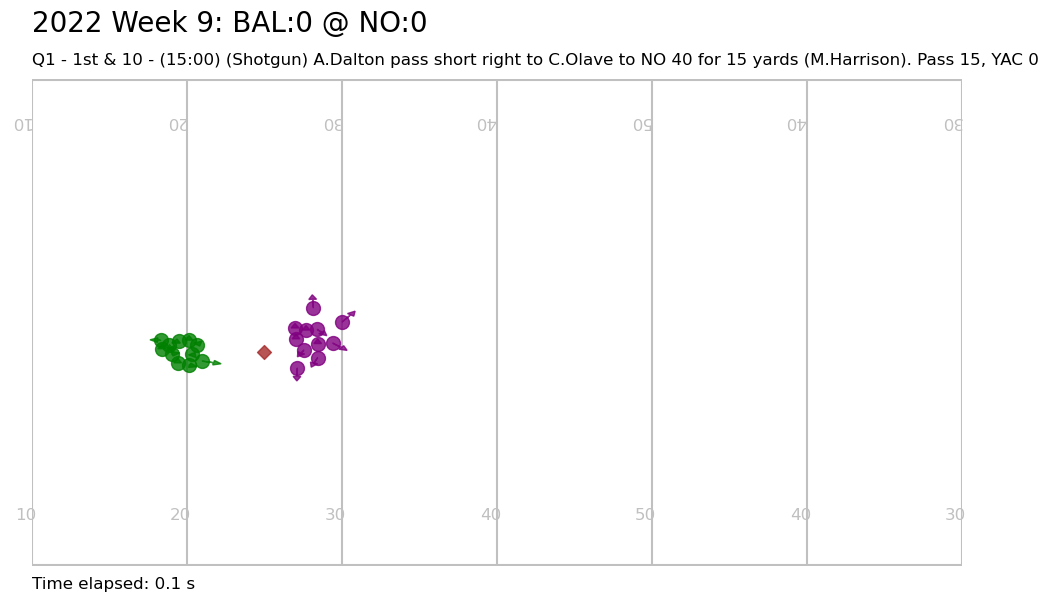

In [10]:
i=1
gid = df_tracking.game_id.values[i]
pid = df_tracking.play_id.values[i]
df = df_tracking[(df_tracking.game_id==gid) & (df_tracking.play_id==pid)]

tdp.plot_play(df, save_path=join(ROOT_DIR,'images','play_animation.gif'))